In [25]:
## The objective is to implement a simple neural network that is able to predict the handwritten number and understanding it in depth (feedforward, back propagation, gradient descent etc ...)
import os
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [77]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

In [73]:
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:09<00:00, 1010745.75it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 267478.57it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:03<00:00, 500446.32it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 521489.39it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [78]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break


Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [142]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


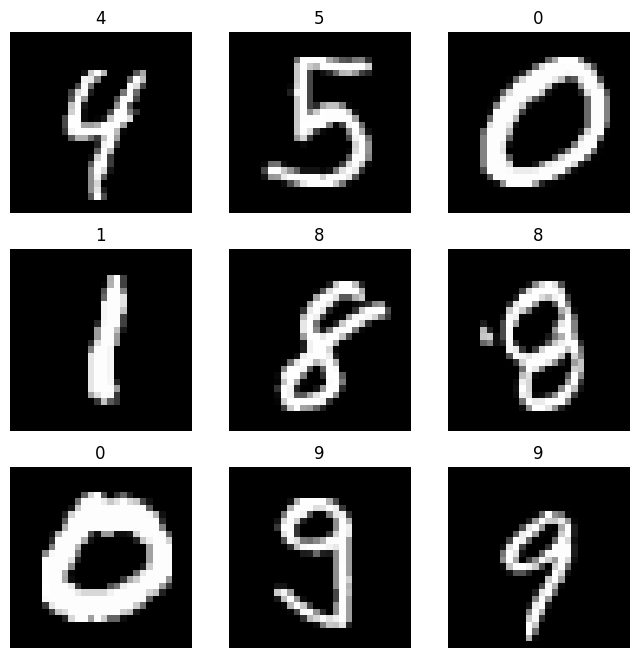

In [143]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [120]:
img, label = training_data[0] 

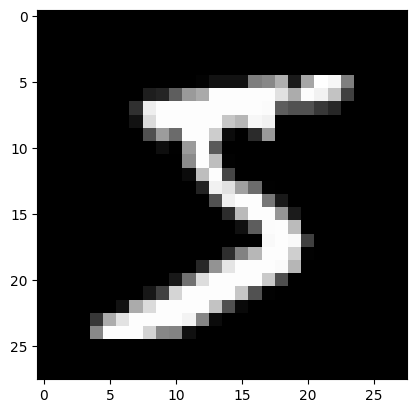

In [121]:
plt.imshow(img.squeeze(),cmap="gray")

In [144]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [145]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [146]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [147]:
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.309383  [   64/60000]
loss: 2.306308  [ 6464/60000]
loss: 2.303094  [12864/60000]
loss: 2.285400  [19264/60000]
loss: 2.288219  [25664/60000]
loss: 2.284680  [32064/60000]
loss: 2.281588  [38464/60000]
loss: 2.272791  [44864/60000]
loss: 2.271743  [51264/60000]
loss: 2.266950  [57664/60000]
Test Error: 
 Accuracy: 29.2%, Avg loss: 2.261695 

Epoch 2
-------------------------------
loss: 2.263241  [   64/60000]
loss: 2.256811  [ 6464/60000]
loss: 2.262609  [12864/60000]
loss: 2.228313  [19264/60000]
loss: 2.239904  [25664/60000]
loss: 2.235115  [32064/60000]
loss: 2.224847  [38464/60000]
loss: 2.231084  [44864/60000]
loss: 2.212641  [51264/60000]
loss: 2.205641  [57664/60000]
Test Error: 
 Accuracy: 58.0%, Avg loss: 2.199923 

Epoch 3
-------------------------------
loss: 2.201001  [   64/60000]
loss: 2.188285  [ 6464/60000]
loss: 2.204435  [12864/60000]
loss: 2.144398  [19264/60000]
loss: 2.164980  [25664/60000]
loss: 2.156660  [32064/600

In [148]:
for name,param in model.named_parameters():
    print(name)
    print(param.size())
    #print(param)
    

linear_relu_stack.0.weight
torch.Size([512, 784])
linear_relu_stack.0.bias
torch.Size([512])
linear_relu_stack.2.weight
torch.Size([512, 512])
linear_relu_stack.2.bias
torch.Size([512])
linear_relu_stack.4.weight
torch.Size([10, 512])
linear_relu_stack.4.bias
torch.Size([10])


In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

In [149]:
classes = [
    "0",
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "7", Actual: "7"


In [165]:
pred[0].argmax(0), classes[y] 

(tensor(7), '7')

In [219]:
pred

tensor([[-0.1794, -4.1351, -0.8166,  1.6256, -1.5167, -0.5128, -6.2219,  8.4741,
         -0.6980,  3.7579]])

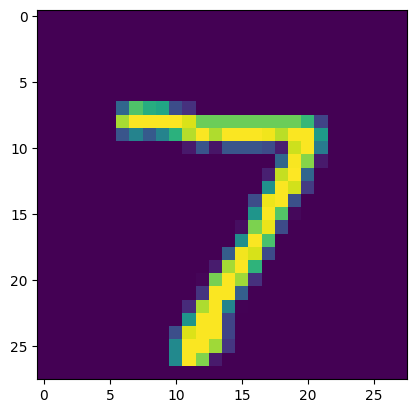

In [161]:
plt.imshow(test_data[0][0].squeeze())

In [180]:
#redo the calculations as per 
import pandas as pd
t = test_data[0][0].squeeze().flatten()
t_np = t.numpy() #convert to Numpy array
df = pd.DataFrame(t_np) #convert to a dataframe
df.to_csv("testfile",index=False) #save to file

In [218]:
for name,param in model.named_parameters():
    name_file = name 
    print(param.size())
    temp_t = param
    temp_t_np = temp_t.detach().numpy() #convert to Numpy array
    df = pd.DataFrame(temp_t_np) #convert to a dataframe
    df.to_csv(name_file+".csv",index=False, sep=';', decimal = ",") #save to file
    #print(param)

torch.Size([512, 784])
torch.Size([512])
torch.Size([512, 512])
torch.Size([512])
torch.Size([10, 512])
torch.Size([10])


In [192]:
temp=[]
for layer in model.parameters():
    temp.append(layer)
    print(layer[1])

#print(temp)

tensor([-0.0236, -0.0115,  0.0049, -0.0200, -0.0142, -0.0260,  0.0241, -0.0248,
         0.0280,  0.0012,  0.0281, -0.0184, -0.0178, -0.0018, -0.0021,  0.0273,
        -0.0103, -0.0170,  0.0011,  0.0069, -0.0005,  0.0140, -0.0097,  0.0002,
        -0.0101, -0.0147,  0.0267, -0.0322, -0.0272,  0.0167,  0.0167, -0.0144,
        -0.0103, -0.0336, -0.0089, -0.0028,  0.0323,  0.0201,  0.0211,  0.0159,
        -0.0105,  0.0031, -0.0121, -0.0312, -0.0341,  0.0120, -0.0031,  0.0004,
         0.0314, -0.0263, -0.0130, -0.0294, -0.0281, -0.0189,  0.0304,  0.0172,
        -0.0230, -0.0049, -0.0340,  0.0164,  0.0311,  0.0307,  0.0294,  0.0249,
         0.0246,  0.0031, -0.0167,  0.0059,  0.0090,  0.0103, -0.0134, -0.0100,
         0.0329,  0.0094,  0.0269,  0.0109,  0.0093, -0.0218, -0.0069,  0.0286,
         0.0069, -0.0234, -0.0168, -0.0026, -0.0237,  0.0200, -0.0095, -0.0096,
         0.0355,  0.0023,  0.0069,  0.0263,  0.0034,  0.0125, -0.0222,  0.0030,
        -0.0238,  0.0115, -0.0338,  0.03

In [215]:
for name,param in model.named_parameters():
    temp_t = param
    temp_t_np = temp_t.detach().numpy() #convert to Numpy array
    print(name)
    df = pd.DataFrame(temp_t_np) #convert to a dataframe
    print(param[233])

linear_relu_stack.0.weight
tensor([ 1.8135e-02,  6.7356e-04, -3.2078e-02, -8.4924e-03, -1.9966e-02,
         1.0875e-02,  2.1775e-03,  2.8990e-03, -3.3373e-03,  1.8536e-02,
         2.1393e-02,  4.3332e-03, -3.4101e-02, -2.7135e-02, -1.8264e-03,
        -2.4802e-02,  3.3812e-02,  2.8994e-02, -1.4244e-02, -2.6729e-02,
         5.5093e-03,  2.3958e-03, -3.0024e-02, -2.2668e-02,  1.1529e-02,
        -1.6966e-03,  1.7700e-02, -8.0533e-03, -1.0773e-02, -8.6254e-03,
        -3.3313e-03, -2.5894e-03, -1.0056e-02,  1.0770e-02,  4.7425e-03,
         3.4681e-02,  2.6394e-02,  1.9841e-02, -1.3072e-03,  1.0523e-02,
         1.0314e-02, -3.3323e-02, -2.0385e-02,  2.8454e-02, -2.9023e-03,
        -5.3652e-03,  2.7662e-02, -9.2387e-03,  3.2007e-03,  1.8151e-02,
         1.2167e-02,  8.6537e-03, -1.2145e-02,  2.0474e-02, -1.2239e-02,
         1.9719e-02, -1.8275e-02, -1.0887e-03, -2.3026e-02, -2.1155e-02,
         7.2517e-03,  1.7620e-02, -3.0705e-02, -2.3666e-02,  2.2021e-02,
        -1.1485e-02, -2.

IndexError: index 233 is out of bounds for dimension 0 with size 10